In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from torch.utils.data import DataLoader
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
import torch.nn as nn



In [20]:
tumor=[]
healthy=[]
path='./brain_tumor_dataset/yes/*.jpg' 
for file in glob.iglob(path):
    img= cv2.imread(file)
    img=cv2.resize(img,(128,128))
    b, g, r= cv2.split(img)
    cv2.merge([r,g,b])
    tumor.append(img)
path='./brain_tumor_dataset/no/*.jpg' 
for file in glob.iglob(path):
    img= cv2.imread(file)
    img=cv2.resize(img,(128,128))
    b, g, r= cv2.split(img)
    cv2.merge([r,g,b])
    healthy.append(img)

In [21]:
len(tumor)

154

In [22]:
len(healthy)

91

In [23]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

**DATA VISUALIZATION**

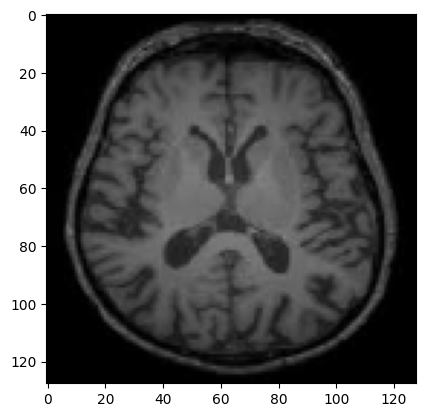

In [24]:
plt.imshow(healthy[0])

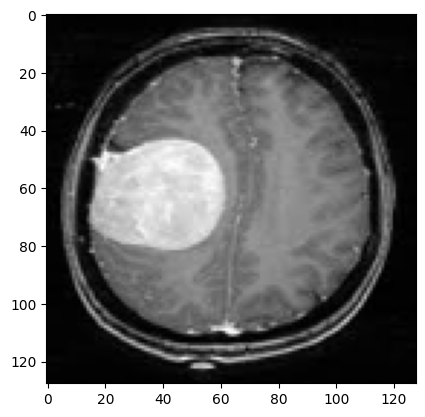

In [25]:
plt.imshow(tumor[0])

In [26]:
class MRI():
    def __init__(self):
        self.images = []
        self.labels = []

        for file in glob.glob('./brain_tumor_dataset/yes/*.jpg'):
            img = cv2.imread(file)
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            self.images.append(img)
            self.labels.append(1)  # tumor = 1

        for file in glob.glob('./brain_tumor_dataset/no/*.jpg'):
            img = cv2.imread(file)
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            self.images.append(img)
            self.labels.append(0)  # no tumor = 0

        self.images = np.array(self.images) / 255.0  # normalize to [0,1]
        self.labels = np.array(self.labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.images[idx], dtype=torch.float32).permute(2,0,1)  # [C,H,W]
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label



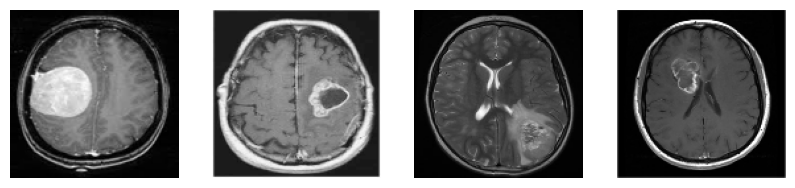

In [27]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(tumor[i],cmap="gray")
    plt.axis("off")

plt.show()

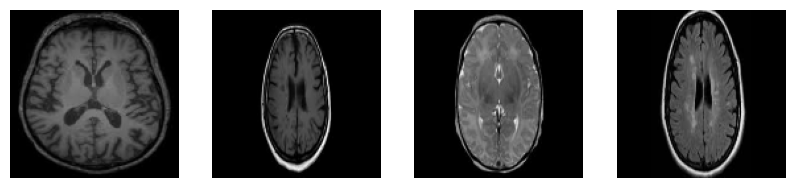

In [28]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(healthy[i],cmap="gray")
    plt.axis("off")

plt.show()

In [29]:

dataset = MRI()
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)



In [30]:

images, labels = next(iter(dataloader))
print(images.shape)
print(labels)


torch.Size([16, 3, 128, 128])
tensor([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])


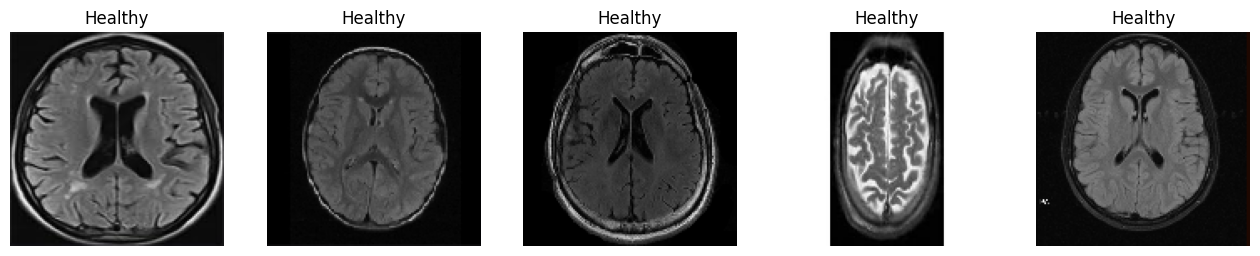

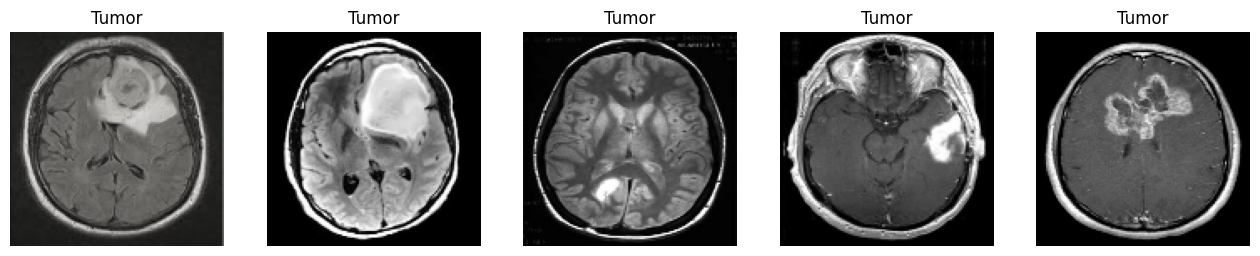

In [31]:
def plt_random(healthy, tumor, num=5):
    healthy_imgs = [healthy[i] for i in np.random.choice(len(healthy), num)]
    tumor_imgs = [tumor[i] for i in np.random.choice(len(tumor), num)]
    plt.figure(figsize=(16, 4))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(healthy_imgs[i])
        plt.title("Healthy")
        plt.axis('off')
    plt.figure(figsize=(16, 4))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(tumor_imgs[i])
        plt.title("Tumor")
        plt.axis('off')

    plt.show()

plt_random(healthy,tumor)

In [32]:

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 32 * 32, 128) 
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 32 * 32 * 32)         
        x = F.relu(self.fc1(x))                
        x = self.fc2(x)                        
        return x


In [33]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0 
    for images, labels in dataloader:
        optimizer.zero_grad()  

        outputs = model(images)  

        loss = criterion(outputs, labels) 

        loss.backward() 

        optimizer.step()  
        total_loss += loss.item() 

    average_loss = total_loss / len(dataloader)  
    print("Epoch", epoch + 1, "Loss:", average_loss)


Epoch 1 Loss: 0.6116670835763216
Epoch 2 Loss: 0.46838199719786644
Epoch 3 Loss: 0.4234884474426508
Epoch 4 Loss: 0.350923758931458
Epoch 5 Loss: 0.23060446279123425


In [34]:
preds = []
true_labels = []  # rename to avoid clash

model.eval()
with torch.no_grad():
    for images, labels in dataloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        preds.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())



[[ 88   3]
 [  3 151]]


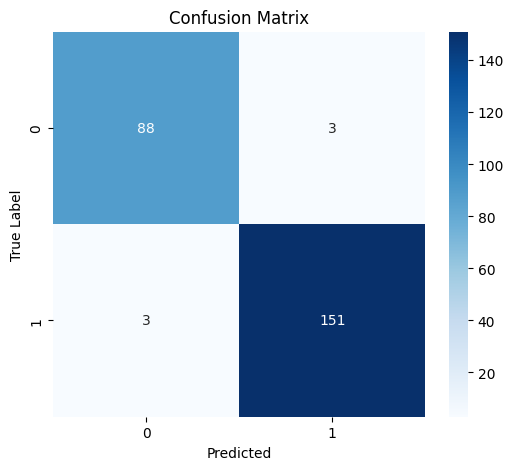

In [35]:
cm = confusion_matrix(true_labels, preds)
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [36]:

correct = sum([1 for t, p in zip(true_labels, preds) if t == p])
total = len(true_labels)
accuracy = correct / total * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.55%
